In [ ]:
!pip install pandas
!pip install seaborn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Prepare data

In [2]:
df_v1_gt_orig = pd.read_csv("latex_tables/v1/ground_truth/20_metrics_v1_ground_truth_nolatex.txt",  sep=',')
df_v1_eevee_orig = pd.read_csv("latex_tables/v1/eevee/20_metrics_v1_eevee_nolatex.txt",  sep=',')
df_v2_gt_orig = pd.read_csv("latex_tables/v2/ground_truth/20_metrics_v2_ground_truth_nolatex.txt",  sep=',')
df_v2_eevee_orig = pd.read_csv("latex_tables/v2/eevee/20_metrics_v2_eevee_nolatex.txt",  sep=',')

In [3]:
def preprocess(df):
    orig = df.copy()
    orig["RIR"] = 1 - orig["RIR"]
    orig.rename(columns={"RIR": "RIRE"}, inplace=True)
    
    logged = orig.copy()
    logged = np.log(orig)
    logged *= -1
    
    # logged["RIRE"] *= -1 
    logged = (logged - logged.min(axis=0))/(logged.max(axis=0) - logged.min(axis=0))
    return logged, orig

In [4]:
df_v1_gt, df_v1_gt_orig = preprocess(df_v1_gt_orig)
df_v1_eevee, df_v1_eevee_orig = preprocess(df_v1_eevee_orig)
df_v2_gt, df_v2_gt_orig = preprocess(df_v2_gt_orig)
df_v2_eevee, df_v2_eevee_orig = preprocess(df_v2_eevee_orig)

In [5]:
df_v1_eevee_orig.head(20)

,ATE,ARE,RTE,RRE,RIRE,RUNTIME
SIFT,0.1677,7.0856,0.0096,0.2491,0.1884,0.1002
Shi-Tomasi,0.0386,4.3565,0.0048,0.1138,0.1100,0.0420
CenSurE,0.2993,11.3189,0.0080,0.2337,0.0940,0.0577
ORB,0.4382,18.3993,0.0162,0.5972,0.1282,0.0605
AKAZE,0.4838,18.5158,0.0202,0.7091,0.1384,0.1836
SIFT+BRIEF,0.2003,10.3900,0.0088,0.2658,0.0322,0.4762
SIFT+SIFT,0.2277,10.9414,0.0109,0.2952,0.0284,0.6197
Shi-Tomasi+BRIEF,0.1564,7.3206,0.0095,0.2302,0.2123,0.0498
Shi-Tomasi+SIFT,0.1159,6.6642,0.0072,0.1968,0.3295,0.2222
Shi-Tomasi+ORB,0.1595,7.2830,0.0105,0.2437,0.1687,0.0540


In [6]:
df_v1_eevee.head(20)

,ATE,ARE,RTE,RRE,RIRE,RUNTIME
SIFT,0.528298,0.763878,0.517665,0.642578,0.284438,0.656557
Shi-Tomasi,1.000000,1.000000,1.000000,1.000000,0.487926,0.949074
CenSurE,0.342282,0.536488,0.644536,0.671693,0.547368,0.842231
ORB,0.219861,0.300636,0.153557,0.243645,0.430024,0.826289
AKAZE,0.188071,0.297572,0.000000,0.165289,0.401073,0.452824
SIFT+BRIEF,0.471254,0.578057,0.578213,0.612973,0.952511,0.132189
SIFT+SIFT,0.430082,0.552954,0.429291,0.565109,1.000000,0.043576
Shi-Tomasi+BRIEF,0.550699,0.748039,0.524952,0.678578,0.239272,0.891766
Shi-Tomasi+SIFT,0.646935,0.793643,0.717852,0.750098,0.073039,0.388628
Shi-Tomasi+ORB,0.544396,0.750539,0.455308,0.652577,0.326205,0.864527


In [7]:
df_v2_eevee.head(20)

,ATE,ARE,RTE,RRE,RIRE,RUNTIME
SIFT,0.205280,0.289076,0.129356,0.338318,0.397864,0.978884
Shi-Tomasi,1.000000,1.000000,1.000000,1.000000,0.681711,0.874833
CenSurE,0.742854,0.783701,0.897772,0.912942,0.758347,0.853887
ORB,0.318774,0.499725,0.196461,0.319500,0.598334,0.973812
AKAZE,0.245941,0.253098,0.149380,0.294958,0.470575,0.462733
SIFT+BRIEF,0.778686,0.850698,0.744312,0.784711,1.000000,0.158308
SIFT+SIFT,0.773919,0.956619,0.719188,0.756332,0.958643,0.072035
Shi-Tomasi+BRIEF,0.495901,0.499045,0.744312,0.707966,0.287680,0.920564
Shi-Tomasi+SIFT,0.447552,0.537223,0.709693,0.660559,0.093931,0.092021
Shi-Tomasi+ORB,0.559583,0.694852,0.682868,0.667142,0.393946,0.888727


In [8]:
def visualize_heatmap(logged, orig):
    plt.figure(figsize=(15, 10))
    plot = sns.heatmap(logged, annot=orig, cmap="RdYlGn", cbar_kws={'ticks': []})

    plt.show(plot)

## Heatmap for the forward sequence

### Optimal Scenario (Viewport)

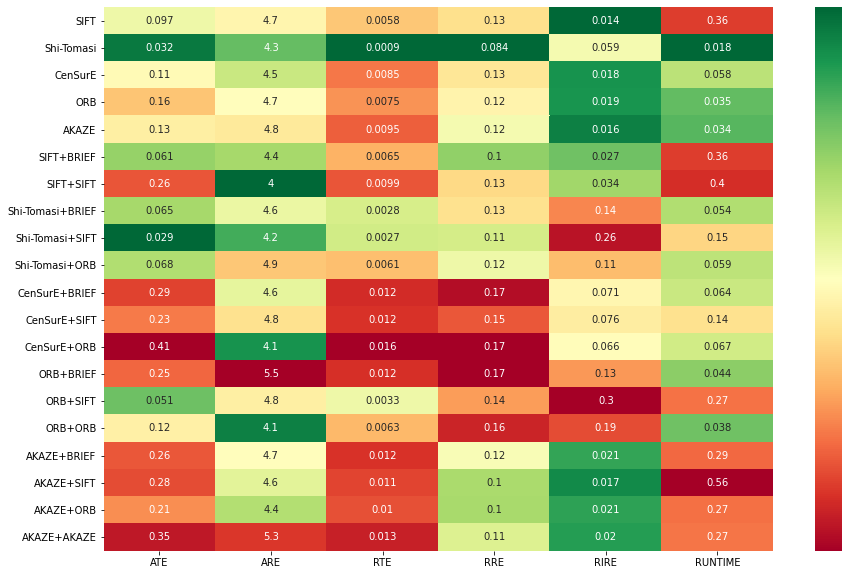

In [9]:
visualize_heatmap(df_v1_gt, df_v1_gt_orig)

### Underwater Scenario (Eevee)

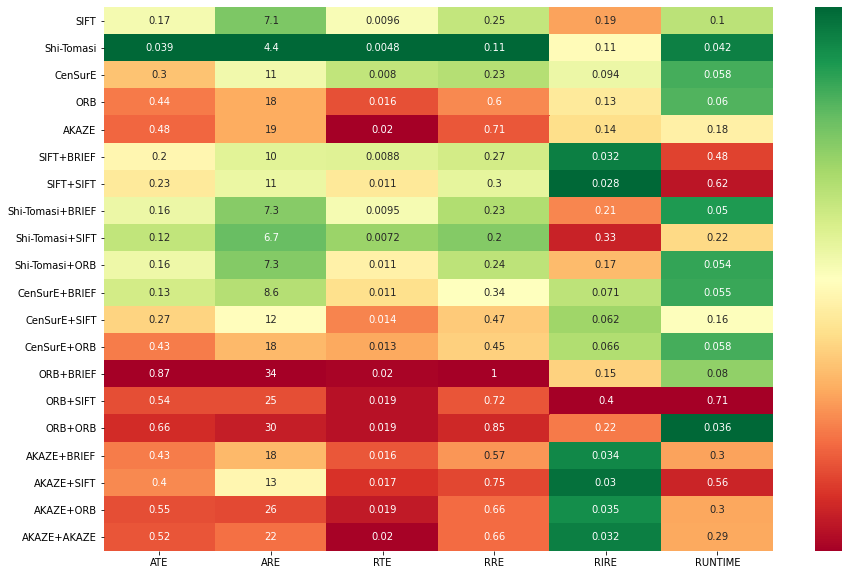

In [10]:
visualize_heatmap(df_v1_eevee, df_v1_eevee_orig)

## Heatmap for the orbital sequence

### Optimal Scenario (Viewport)

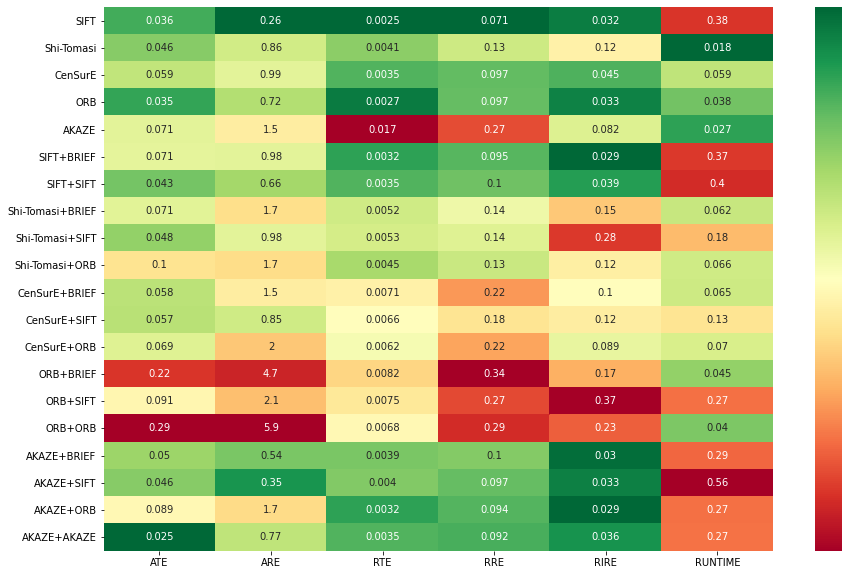

In [11]:
visualize_heatmap(df_v2_gt, df_v2_gt_orig)

### Underwater Scenario (Eevee)

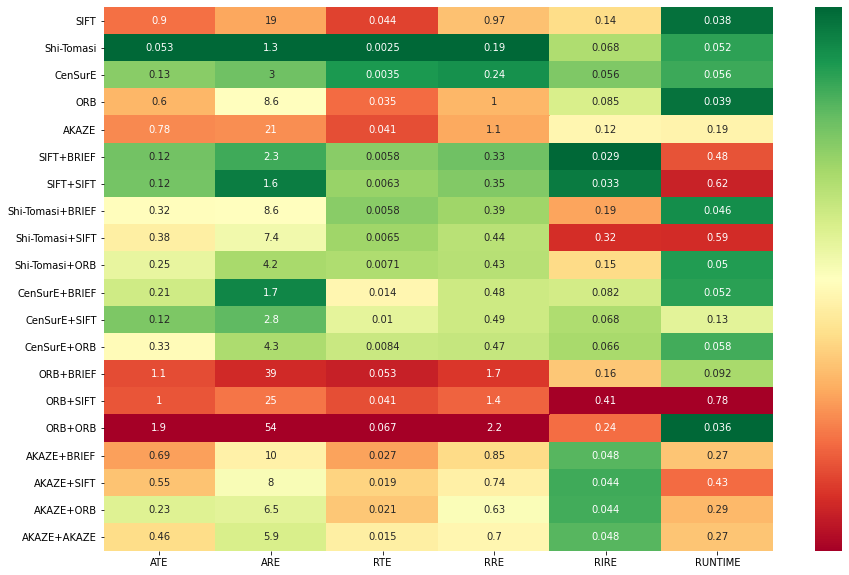

In [12]:
visualize_heatmap(df_v2_eevee, df_v2_eevee_orig)